In [5]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import pandas as pd

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
coord = SkyCoord(ra=225.099, dec=-82.204, unit=(u.deg, u.deg), frame='icrs')

# c = SkyCoord('15 00 18.45  -82 12 49.3s', unit=(u.hourangle, u.deg))
# print(c)
# ra_deg = c.ra.deg
# dec_deg = c.dec.deg
# print(f"RA in degrees: {ra_deg}, Dec in degrees: {dec_deg}")

Gaia.ROW_LIMIT=-1
width = u.Quantity(0.5, u.deg)
height = u.Quantity(0.5, u.deg)
gaia_table = Gaia.query_object_async(coordinate=coord, width=width, height=height)

df = gaia_table.to_pandas()
selected_columns = df[['dist', 'ra', 'ra_error', 'dec', 'dec_error', 'phot_g_mean_flux', 
                       'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_bp_mean_flux', 
                       'phot_bp_mean_flux_error', 'phot_bp_mean_mag', 'phot_rp_mean_flux', 
                       'phot_rp_mean_flux_error', 'phot_rp_mean_mag', 'bp_rp', 'g_rp', 'bp_g'
                      ]]

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)
selected_columns

INFO: Query finished. [astroquery.utils.tap.core]


,dist,ra,ra_error,dec,dec_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,g_rp,bp_g
0,0.000654,225.103726,4.667208,-82.203837,3.656449,78.465410,6.258381,20.950672,NaN,NaN,NaN,145.317356,36.979836,19.342102,NaN,1.608570,NaN
1,0.000685,225.094934,3.641980,-82.204395,1.911303,73.097636,1.923355,21.027609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001010,225.100859,0.629246,-82.204978,0.573224,116.490630,0.934823,20.521639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.001104,225.096395,8.223614,-82.205041,6.534617,83.804768,2.421985,20.879194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001273,225.097486,0.319074,-82.205253,0.297855,186.538569,0.793165,20.010445,99.478805,6.221558,20.344215,176.480131,8.928227,19.131155,1.213060,0.879290,0.333771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,0.249156,224.905547,1.681338,-82.451811,2.178663,77.655928,1.207520,20.961931,39.993879,15.570728,21.333559,117.017919,12.528250,19.577265,1.756294,1.384666,0.371628
3966,0.249319,225.262540,0.448306,-81.955699,0.402029,141.242299,0.741313,20.312454,43.593677,4.533210,21.239983,132.370023,5.599501,19.443422,1.796560,0.869032,0.927528
3967,0.249919,225.285488,0.493921,-81.955402,0.404426,124.866298,0.725448,20.446253,48.855533,6.824531,21.116259,100.868114,6.458677,19.738510,1.377748,0.707743,0.670006
3968,0.250459,225.264343,0.916508,-82.453483,0.743453,106.413315,0.839539,20.619877,34.927499,7.839202,21.480623,135.696761,8.581154,19.416471,2.064152,1.203405,0.860746


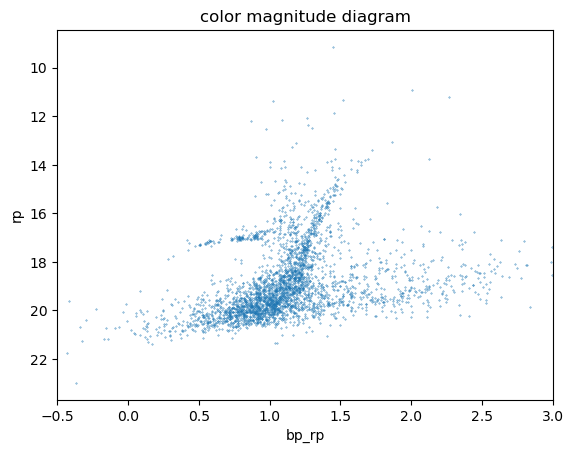

In [9]:
import matplotlib.pyplot as plt

plt.scatter(selected_columns['bp_rp'], selected_columns['phot_rp_mean_mag'], s=0.1)

plt.xlabel('bp_rp')  
plt.ylabel('rp')
plt.title('color magnitude diagram')

plt.gca().invert_yaxis()
plt.xlim(-0.5, 3.0)
plt.savefig("plot1")
plt.show()

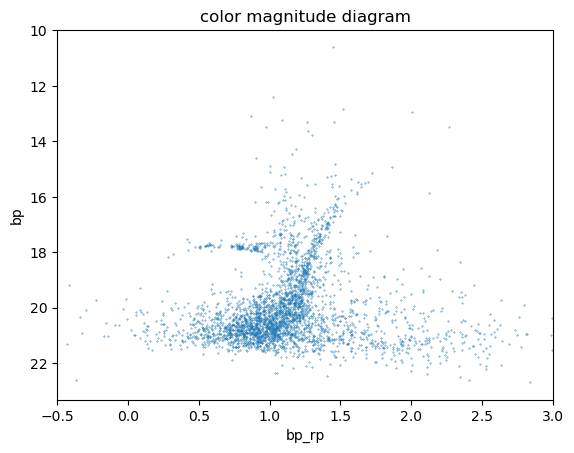

In [21]:
import matplotlib.pyplot as plt

plt.scatter(selected_columns['bp_rp'], selected_columns['phot_bp_mean_mag'], s=0.1)

plt.xlabel('bp_rp') 
plt.ylabel('bp')
plt.title('color magnitude diagram')

plt.gca().invert_yaxis()
plt.xlim(-0.5, 3.0)
plt.savefig("plot2")
plt.show()

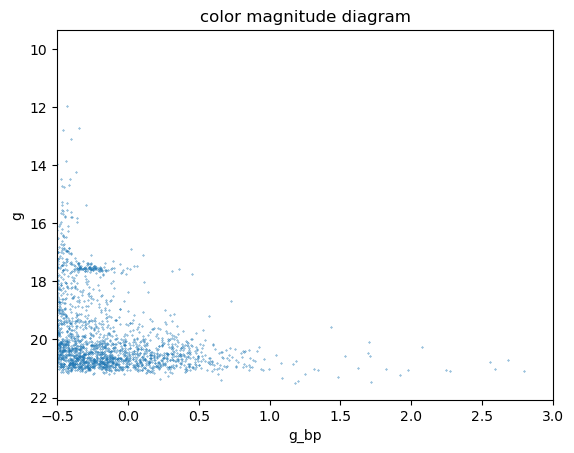

In [13]:
import matplotlib.pyplot as plt

df['g_bp'] = selected_columns['phot_g_mean_mag'] - selected_columns['phot_bp_mean_mag']

plt.scatter(df['g_bp'], selected_columns['phot_g_mean_mag'], s=0.1)

plt.xlabel('g_bp') 
plt.ylabel('g')
plt.title('color magnitude diagram')

plt.gca().invert_yaxis()
plt.xlim(-0.5, 3.0)
plt.savefig("plot3")
plt.show()

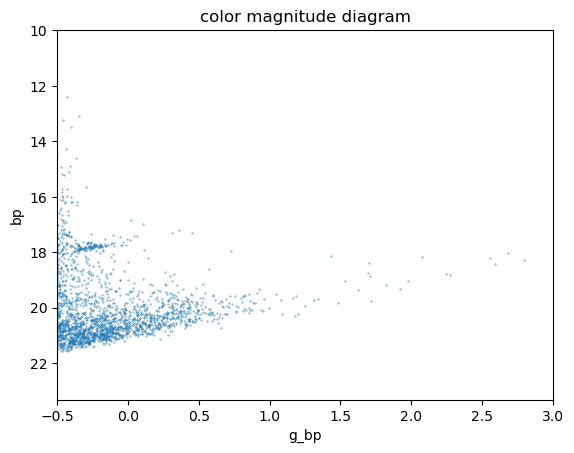

In [15]:
import matplotlib.pyplot as plt

df['g_bp'] = selected_columns['phot_g_mean_mag'] - selected_columns['phot_bp_mean_mag']

plt.scatter(df['g_bp'], selected_columns['phot_bp_mean_mag'], s=0.1)

plt.xlabel('g_bp') 
plt.ylabel('bp')
plt.title('color magnitude diagram')

plt.gca().invert_yaxis()
plt.xlim(-0.5, 3.0)
plt.savefig("plot4")
plt.show()

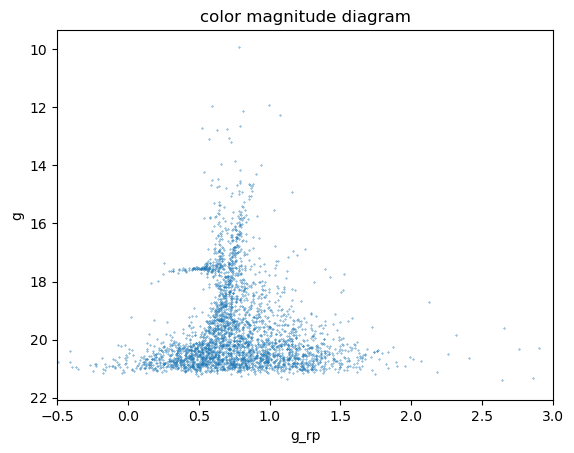

In [23]:
import matplotlib.pyplot as plt

plt.scatter(selected_columns['g_rp'], selected_columns['phot_g_mean_mag'], s=0.1)

plt.xlabel('g_rp') 
plt.ylabel('g')
plt.title('color magnitude diagram')

plt.gca().invert_yaxis()
plt.xlim(-0.5, 3.0)
plt.savefig("plot5")
plt.show()

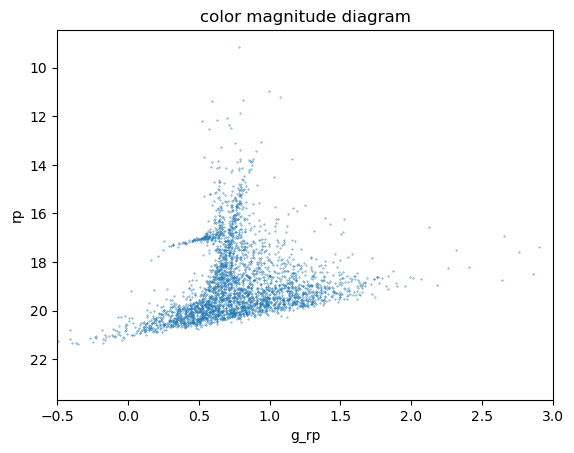

In [25]:
import matplotlib.pyplot as plt

plt.scatter(selected_columns['g_rp'], selected_columns['phot_rp_mean_mag'], s=0.1)

plt.xlabel('g_rp') 
plt.ylabel('rp')
plt.title('color magnitude diagram')

plt.gca().invert_yaxis()
plt.xlim(-0.5, 3.0)
plt.savefig("plot6")
plt.show()